In [15]:
import ephem
import datetime
import pylab             as     pl
import numpy             as     np
import matplotlib.pyplot as     plt

from   IPython.display   import Image
from   matplotlib        import animation, rc
from   IPython.display   import HTML

In [16]:
%matplotlib inline

In [17]:
venus = ephem.Venus()
sun   = ephem.Sun()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec)

8:28:58.50 17:51:55.0


In [18]:
ephem.constellation(venus)

('Cnc', 'Cancer')

In [13]:
chichen_itza         = ephem.Observer()

chichen_itza.lat     = '20.683056'
chichen_itza.lon     = '88.568611'
chichen_itza.horizon = 0.0

In [200]:
# First rising date time:  2020/1/2 03:01:29

start_date         = datetime.datetime(2020, 1,   1)

# First sun rise;  print(chichen_itza.previous_rising(sun))
start_time         = datetime.time(23, 52, 2)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

end_date           = datetime.datetime(2030, 1, 1)

delta              = datetime.timedelta(hours=1)

datetimes          = []
angular_pos        = []

# [magnitude, diameter in arcseconds, earth_distance, phase]
props              = []

sunrises           = []

while start_datetime  <= end_date:    
    start_datetime    += delta
    
    chichen_itza.date  = start_datetime.strftime("%Y/%m/%d %H:%M:%S")
    
    sun.compute(chichen_itza)
    venus.compute(chichen_itza)
    
    datetimes.append(start_datetime)

    props.append([venus.mag, venus.size, venus.earth_distance, venus.phase, venus.elong])
    
    angular_pos.append([chichen_itza.date, sun.alt, venus.az, venus.alt])

    sunrises.append(chichen_itza.previous_rising(sun))
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [201]:
angular_pos = np.array(angular_pos)
props       = np.array(props)
sunrises    = np.array(sunrises)

In [202]:
angular_pos[:,1:] *= 180. / np.pi

In [203]:
# years     = np.array([x.year for x in datetimes]) 
# uyears    = np.unique(years)

In [204]:
sunrises   -= 44567

In [205]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

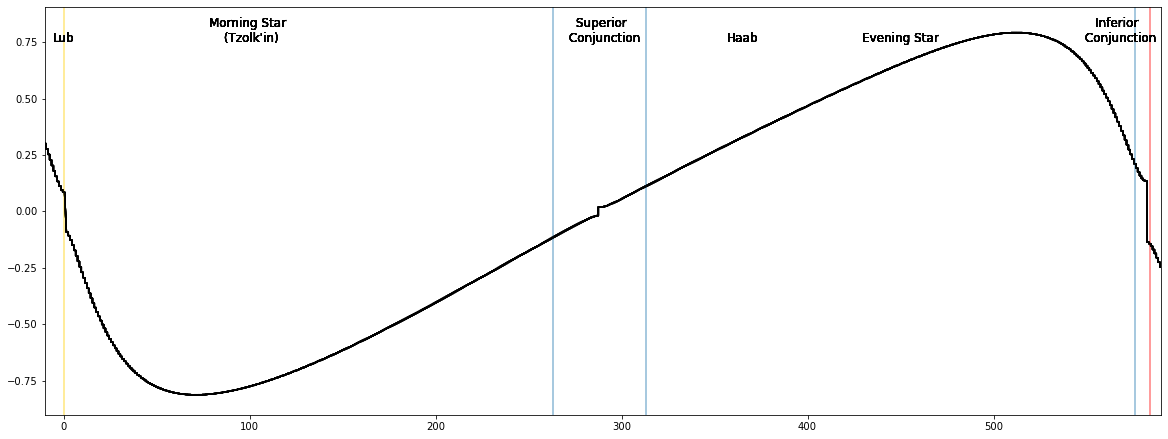

In [215]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

for color, year in zip(color_cycle, uyears):
    # in_year = years == year

    # ax.set_xlim(left=5.5, right=0.5)
    # ax.set_ylim(bottom=0.0, top=1.6)
    
    # http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html
    # ax.plot(angular_pos[in_year,1], angular_pos[in_year,2], marker='.', lw=0.0, markersize=1)
    
    ax.plot(sunrises, props[:,-1], c='k')
    
    ax.set_xlim(left=-10, right=590)
    
    ax.axvline(0.,   alpha=0.5, lw=0.2, c ='gold')
    ax.axvline(263., alpha=0.5, lw=0.2)
    ax.axvline(313., alpha=0.5, lw=0.2)
    ax.axvline(576., alpha=0.5, lw=0.2)
    ax.axvline(584., alpha=0.5, lw=0.2, c='red')
    
    ax.text(x=0,   y=0.75, s='Lub', horizontalalignment='center', fontsize=12)
    ax.text(x=100, y=0.75, s='Morning Star \n (Tzolk\'in)', horizontalalignment='center', fontsize=12)
    ax.text(x=290, y=0.75, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
    ax.text(x=365, y=0.75, s='Haab', horizontalalignment='center', fontsize=12)
    ax.text(x=450, y=0.75, s='Evening Star', horizontalalignment='center', fontsize=12)
    ax.text(x=567, y=0.75, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)
    
pl.savefig('images/venus.pdf')

In [207]:
2920. / 584.

5.0

In [208]:
cycles        = {}

In [209]:
for i in range(5):
  zero        = 584. * i

  # Sun is above the horizon.
  in_cycle    = (sunrises >= zero)        & (sunrises < zero + 585.) & (angular_pos[:,1] > 0.)

  in_morning  = (sunrises >= zero)        & (sunrises < zero + 263.) & (angular_pos[:,1] > 0.)
  in_superior = (sunrises >= zero + 263.) & (sunrises < zero + 313.) & (angular_pos[:,1] > 0.)
  in_evening  = (sunrises >= zero + 313.) & (sunrises < zero + 576.) & (angular_pos[:,1] > 0.)
  in_inferior = (sunrises >= zero + 576.) & (sunrises < zero + 584.) & (angular_pos[:,1] > 0.)

  cycles[i]   = [in_morning, in_superior, in_evening, in_inferior]

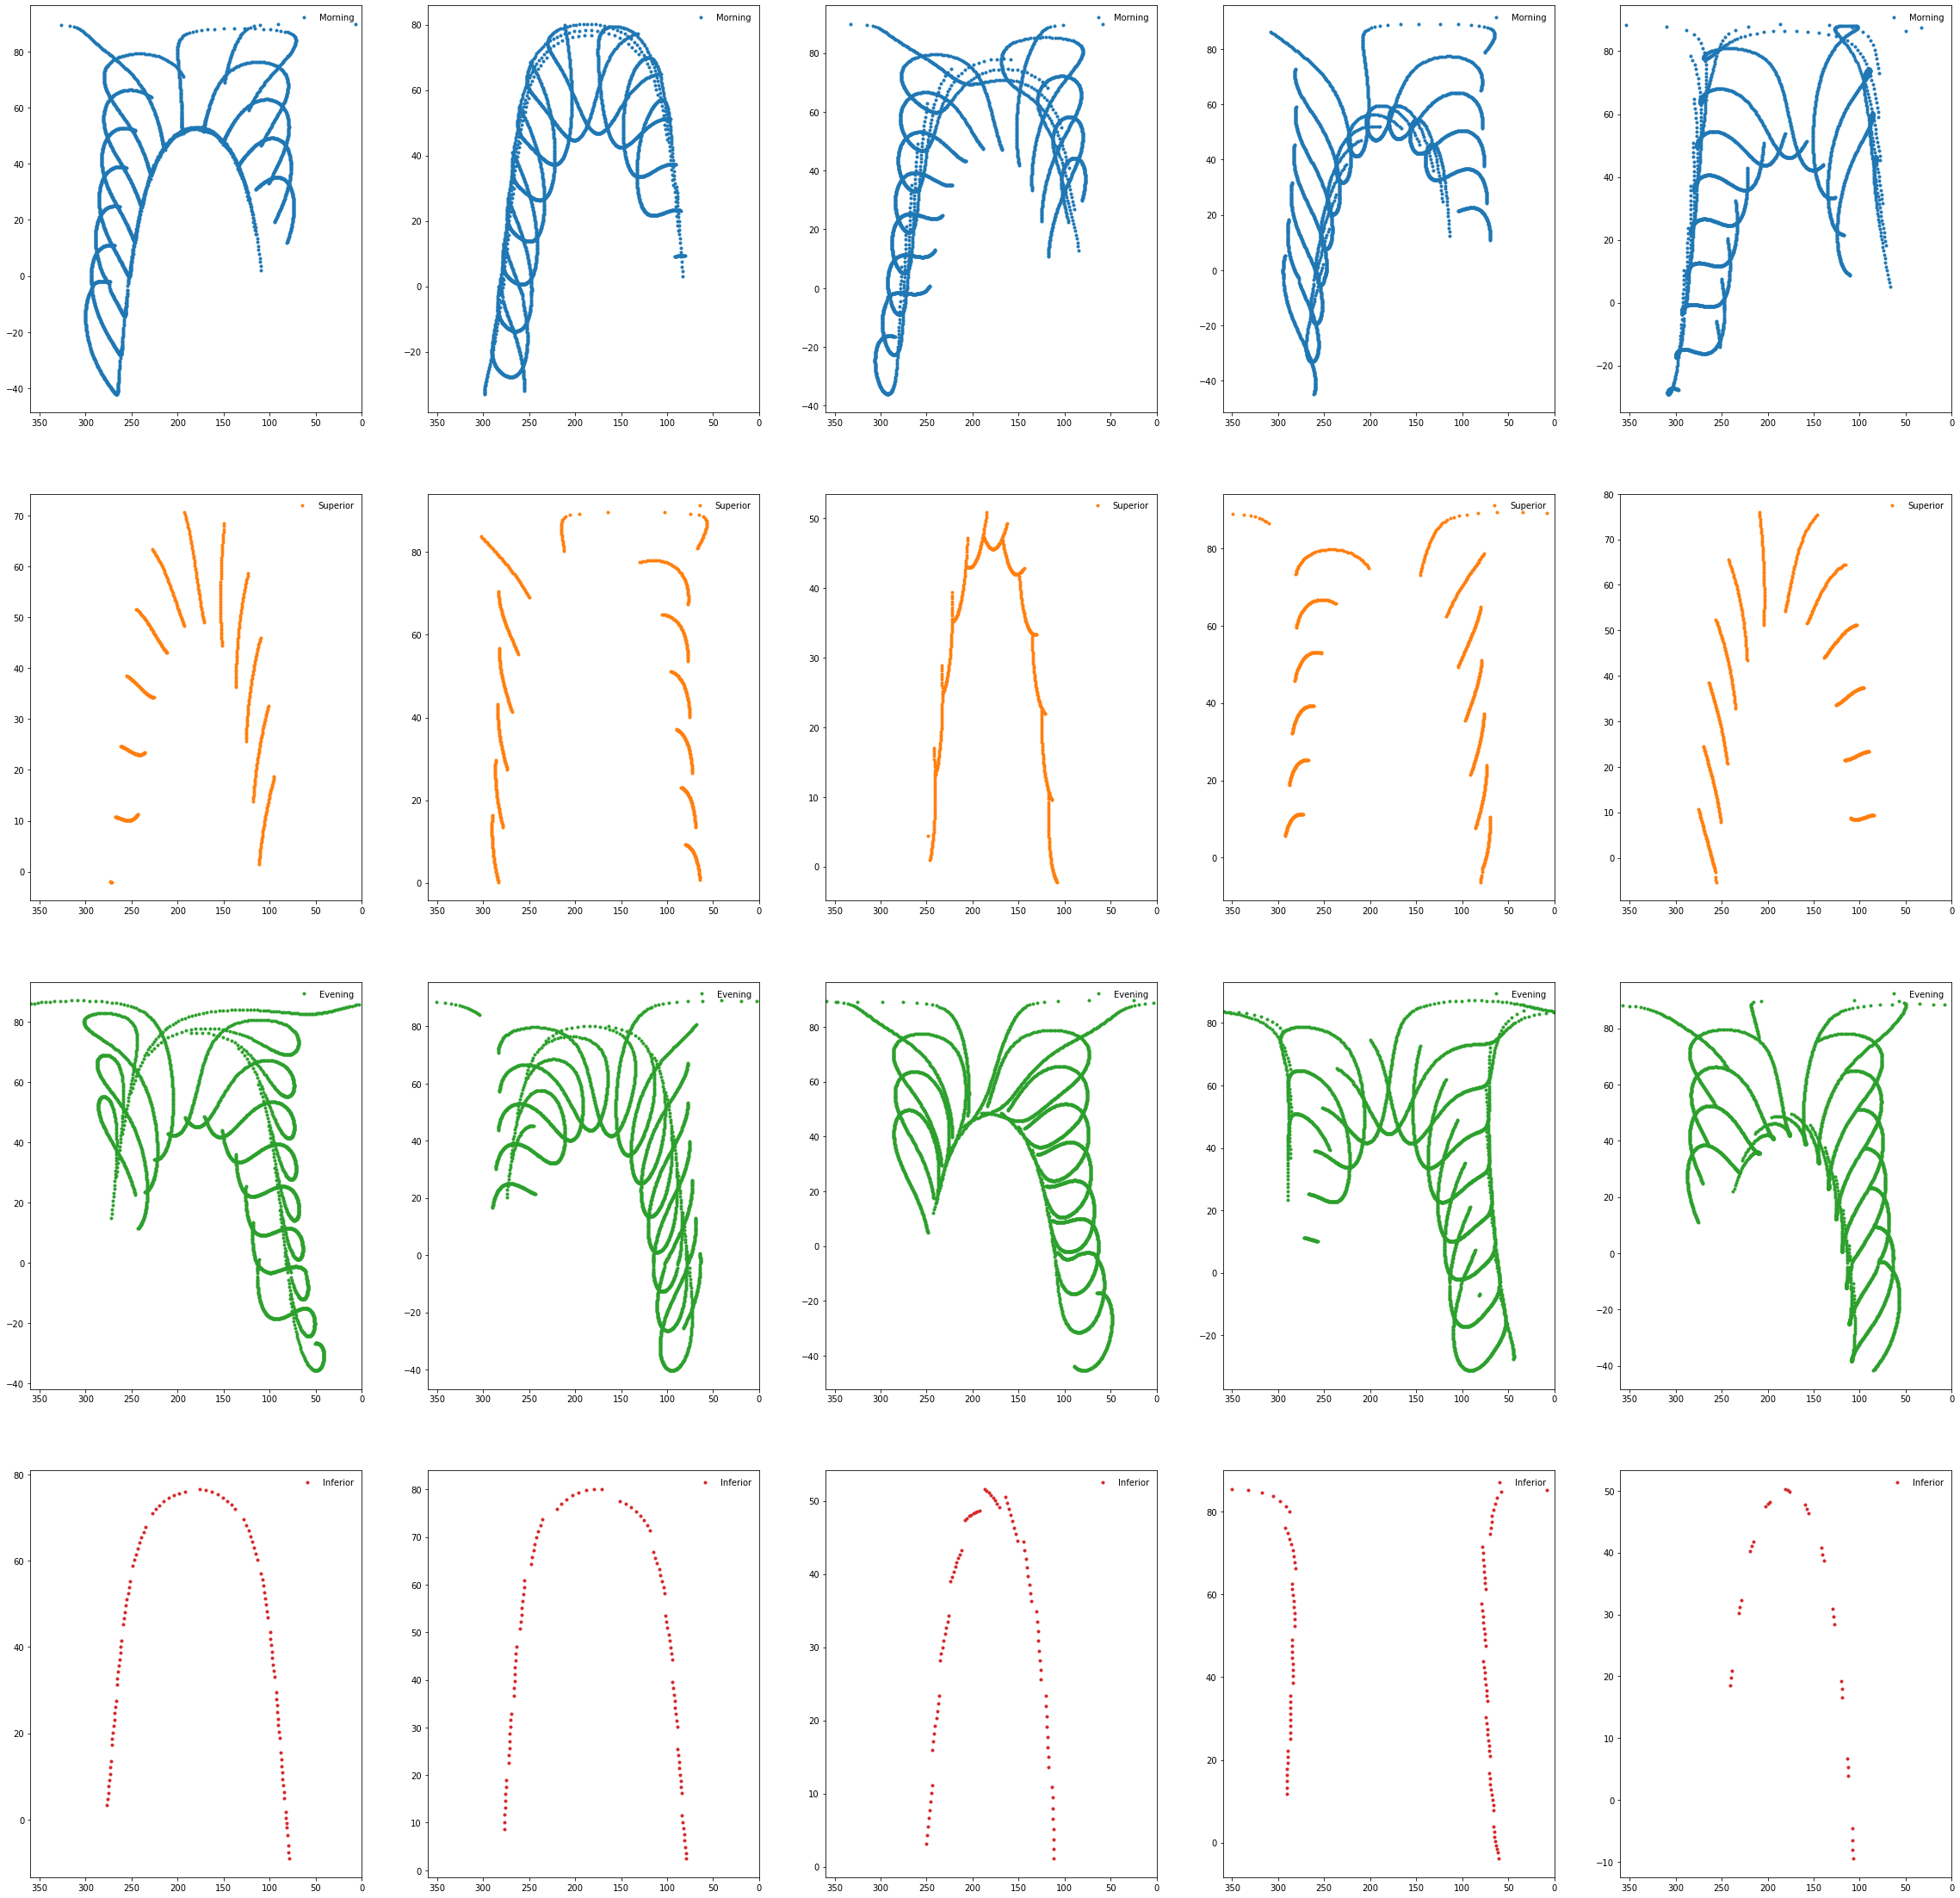

In [210]:
fig, ax     = plt.subplots(4, 5, figsize=(40, 40))

labels      = ['Morning', 'Superior', 'Evening', 'Inferior'] 

for j in range(5):
  for i, (color, sample, label) in enumerate(zip(color_cycle, cycles[j], labels)):
    ax[i,j].plot(angular_pos[sample,2], angular_pos[sample,3], c=color, lw=0.0, marker='.', label=label)
    ax[i,j].legend(frameon=False, loc=1)
    
    ax[i,j].set_xlim(left=360., right=0.0)

Haab    = year = 365 days

Lub     = synodic period = 584 days.

Tzolkin = 263 days = Morning Star period = Evening Star period.  

Lubay   = 13 years.

In [217]:
365. * 104.

37960.0

In [219]:
260 * 146

37960

In [220]:
584. * 65. 

37960.0

After thirteen lubs, the table returns to its Lubay or "great resting place" where all the cycles begin again.  The whole cycle then repeats itself.  The Universe must have seemed in perfect harmony with their world on that Ahaw day when the Lubay was reached and the thirteen cycles of Venus begin again. 

One page, is thirteen rows of the four transition dates in a synodic period.  Five pages complete one Lub. 

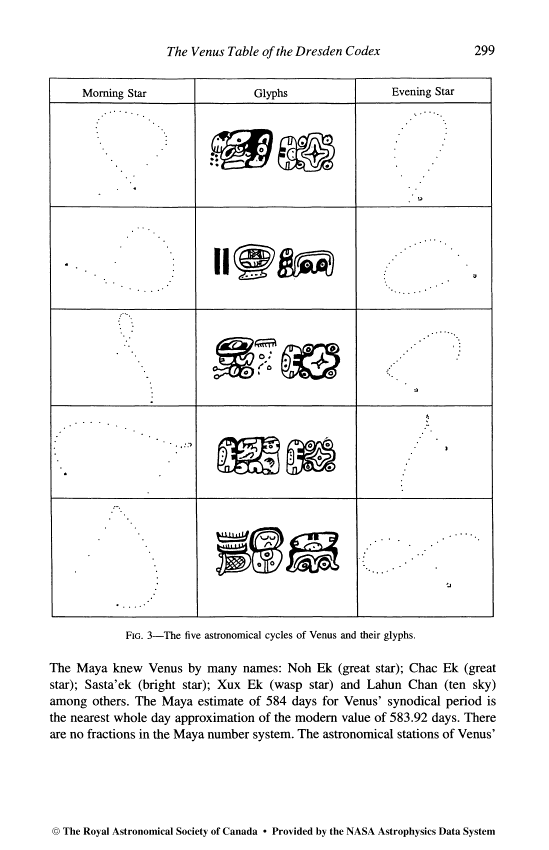

In [223]:
Image(filename='images/MayanGlyphs.gif')

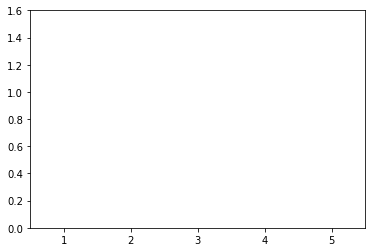

In [12]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(left=0.5, right=5.5)
ax.set_ylim(bottom=0.0, top=1.6)

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html
line, =  ax.plot([], [], marker='.', lw=2.0, markersize=10)

texts = [ax.text(0.80, 0.95,  '', transform=ax.transAxes) for i in range(len(angular_pos))]

In [13]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    
    return (line,)

In [29]:
# animation function. This is called sequentially
def animate(i):
    x = angular_pos[in_year,1][i]
    y = angular_pos[in_year,2][i]
    
    line.set_data(x, y)
    line.set_markersize(props[i, 1])
    
    texts[i].set_text('{}'.format(angular_pos[i, 0]))
    
    return (line,)

In [35]:
# call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=100, interval=1.e3, blit=False, repeat=True)

In [34]:
# HTML(anim.to_html5_video())